In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# functions for drawing violin plots
plt.rcParams['text.usetex'] = True

def set_axis_style(ax, labels):
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(16)
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(ticks=np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.45, len(labels) + 0.55)
    ax.set_xlabel('Epoch number')
    ax.set_ylabel(r'$\tilde{\delta}$')
    
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value

def draw_violin(data_dir, epoches, save_file=None):
    data = []
    for i, epoch in enumerate(epoches):
        data_file = "noise_array_{}.npy".format(epoch)
        data_path = os.path.join(data_dir, data_file)
        array = np.load(data_path)
        data.append(sorted(array))

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(len(epoches) * 2, 4))
    parts = ax.violinplot(
            data, widths=0.75, showmeans=False, showmedians=False,
            showextrema=False)


    body_colors = ["#D5E8D4", "#DAE8FC", "#FFE6CC", "#F8CECC"] #green, blue, orange, red
    for pc, color in list(zip(parts['bodies'], body_colors)):
        pc.set_facecolor(color)
        pc.set_edgecolor('black')
        pc.set_alpha(1)

    quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75], axis=1)
    mean = np.mean(data, axis=1)
    whiskers = np.array([
        adjacent_values(sorted_array, q1, q3)
        for sorted_array, q1, q3 in zip(data, quartile1, quartile3)])
    whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

    inds = np.arange(1, len(medians) + 1)
    ax.scatter(inds, mean, marker='_', color='white', s=60, zorder=3)
    ax.vlines(inds, quartile1, quartile3, color='black', linestyle='-', lw=5)
    ax.vlines(inds, whiskers_min, whiskers_max, color='black', linestyle='-', lw=1)
    ax.hlines(0.00, 0, 9, color='black', linestyle='dotted', lw=1)
    set_axis_style(ax, epoches)
    
    if save_file != None:
        plt.savefig(save_file, bbox_inches='tight')  

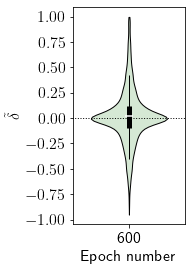

In [3]:
data_dir = "../../exps/ckpt_log_clipping/logs/" 

epoches = ["600"] # You can provide a list of epoch numbers to draw their violin plots in the same figure

draw_violin(data_dir, epoches)